# Introduction to Deep Learning with PyTorch

[PyTorch](https://pytorch.org/) is one of the frameworks to create, train, and inference Deep Neural Network (DNN) models. Besides, it allows you to do a lot of math and linear algebra operations (The syntax is similar to NumPy).

The official documentation has a lot of [examples and tutorials](https://pytorch.org/tutorials/), which are very helpful for the beginners. We advise you to have a look at them. Here are some useful links:

* [Basics](https://pytorch.org/tutorials/beginner/basics/intro.html): several tutorials on basic PyTorch stuff
* [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

This seminar is partially built on these tutorials and [this seminar](https://github.com/markovka17/dla/blob/2023/week01/seminar.ipynb)

In [1]:
# Some imports

# computation stuff
import torch
import numpy as np

# plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # makes the quality higher

import seaborn as sns
sns.set_style("whitegrid") # improves the quality of matplotlib images and adds grid

## Creation of Tensors

Tensors, basically, are generalization of matrices to more than 2 dimensions: $T \in \mathbb{R}^{D_1 \times D_2 \times D_3 \times ... \times D_n}$ (Note: `PyTorch` also supports tensors in $\mathbb{C}$). `PyTorch` supports several creation techniques:

* From existing iterable array-like object: Python List, NumPy array, etc.
* Using built-in functions (similar to NumPy)

In [2]:
iterable_object = [1, 2, 3]
tensor = torch.tensor(iterable_object)
print(iterable_object, tensor)

[1, 2, 3] tensor([1, 2, 3])


In [3]:
iterable_object = np.array([1, 2, 3])
tensor = torch.tensor(iterable_object)
print(iterable_object, tensor)

[1 2 3] tensor([1, 2, 3])


Built-it methods are preferred to save memory and increase speed.

In [4]:
numpy_array = np.arange(3)
tensor = torch.arange(3)
print(numpy_array, tensor)

[0 1 2] tensor([0, 1, 2])


For each tensor object, we can access some meta information

In [5]:
print(f"Type of elements: {tensor.dtype}")
print(f"Size (or shape) : {tensor.size()}") # equivalent to tensor.shape # Note that we do not have () here
print(f"Number of dimensions: {tensor.dim()}")

Type of elements: torch.int64
Size (or shape) : torch.Size([3])
Number of dimensions: 1


We can create multi-dimensional tensors

In [6]:
desired_shape = (3, 2, 5) # or [3, 2, 5]

tensor = torch.zeros(desired_shape)
print(f"Zeros tensor: {tensor}")
print(f"Shape: {tensor.shape}")
print("-----------\n")

tensor = torch.randn(desired_shape)
print(f"Random N(0, 1) tensor: {tensor}")
print(f"Shape: {tensor.shape}")

Zeros tensor: tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
Shape: torch.Size([3, 2, 5])
-----------

Random N(0, 1) tensor: tensor([[[ 0.3452, -1.8426, -0.5053, -0.1491,  0.5294],
         [ 0.5500, -1.2011,  1.2593, -0.6449,  0.3399]],

        [[-2.1666,  2.4026,  0.3618,  1.5458, -0.5531],
         [ 0.0579,  0.6697, -0.7179,  0.1489,  0.0243]],

        [[-0.2898, -0.3655, -0.0576, -0.6845, -1.7430],
         [ 2.4222,  1.2887, -0.4693, -0.3146,  1.0934]]])
Shape: torch.Size([3, 2, 5])


It is also possible to reshape the tensors. In PyTorch, there are 2 methods for this: `view` and `reshape`. They have the same syntax and the first one is preferred, however, the former does not work sometimes (you will get a `Runtime Error`). In such a case, usually you can replace `view` with `reshape` and everything will work fine.

In [7]:
tensor = torch.arange(10)
print("Orig:", tensor)
print()

tensor_reshape = tensor.reshape(2, 5)
print("Reshape:", tensor_reshape)
print("Reshape shape:", tensor_reshape.shape)
print()

tensor_view = tensor.view(2, 5)
print("View:", tensor_view)
print("View shape:", tensor_view.shape)
print()
print("Orig again:", tensor)
print("Orig shape:", tensor.shape)

Orig: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Reshape: tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
Reshape shape: torch.Size([2, 5])

View: tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
View shape: torch.Size([2, 5])

Orig again: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Orig shape: torch.Size([10])


Multi-dimensional reshapes are also supported:

In [8]:
tensor = torch.arange(100)
tensor_3d = tensor.view(2, 5, 10)
print("Old shape:", tensor.shape)
print("New shape:", tensor_3d.shape)

Old shape: torch.Size([100])
New shape: torch.Size([2, 5, 10])


Sometimes you may want to swap some dimensions or permute them:

In [9]:
tensor_3d_v2 = tensor_3d.transpose(-1, -2) # swap the two last dimensions
print(tensor_3d_v2.shape)
print()

# use permute if you want to change more than 2 dimensions
tensor_3d_v3 = tensor_3d.permute(1, 2, 0) # put the 1 dim to the 0 place, 2 dim to the 1 place and 0 to the last place
print(tensor_3d_v3.shape)

torch.Size([2, 10, 5])

torch.Size([5, 10, 2])


The common operation is to add extra dimension (to satisfy required shape conditions for a given operation. For example, your layer want 3D input but you only have 2D input)

In [10]:
tensor = torch.arange(10).view(2, 5)
print(tensor.shape)

tensor_unsqueeze = tensor.unsqueeze(1) # add imaginary dimension at the first index
print(tensor_unsqueeze.shape)

# you can also do it like this
tensor_new_axis = tensor[:, None, :]
print(tensor_new_axis.shape)

torch.Size([2, 5])
torch.Size([2, 1, 5])
torch.Size([2, 1, 5])


And in fact, there are many other useful functions that often come in handy.
For example, `.chunk`, `.unfold`, `.flatten`, `.scatter`, `.gather`, ....

So, feel free to dive into the PyTorch documentation and find out more yourself :)

# Tensor operations

`PyTorch` and `NumPy` syntax are similar. You can do many operations on tensors

In [11]:
# aggregation funcs

tensor = torch.randn(10, 100, 1000)
print(tensor.shape)
tensor.mean(), tensor.sum(), tensor.max(), tensor.min()

torch.Size([10, 100, 1000])


(tensor(0.0014), tensor(1427.5685), tensor(4.6509), tensor(-4.5790))

Note that aggregation funcs have `dim` and `keepdim` arguments

In [12]:
# take mean over 0 dimension
print(tensor.mean(dim=0).shape)

# or over 0 and 1 dimensions
print(tensor.mean(dim=(0, 1)).shape)

torch.Size([100, 1000])
torch.Size([1000])


In [13]:
# take mean over 0 and 2 dimensions and keep dimensions (i.e., the number of dimensions stays the same)
print(tensor.mean(dim=(0, 2), keepdim=True).shape)

torch.Size([1, 100, 1])


In [14]:
# Frobenius norm
print(tensor.norm(p='fro'))

tensor(999.1323)


Linear algebra is also similar to `NumPy`

In [15]:
A = torch.randn(10, 20)
B = torch.randn(20, 30)

C1 = A.matmul(B)

# or
C2 = A @ B

# or
C3 = torch.matmul(A, B)

assert torch.equal(C1, C2)
assert torch.equal(C2, C3)

# Automatic Differentiation

Gradient automatic computation using back-propagation:
1. Create a tensor/tensors which requires gradient: `a = torch.tensor(..., requires_grad=True)`
2. Define some differentiable scalar function `loss = whatever(a)`
3. Request backward pass `loss.backward()`
4. The gradient is available as `a.grad`
    
Note the loss must be a function of at least one tensor which requires gradient.
For more information see https://pytorch.org/docs/stable/autograd.html

Let's look on a simple example



In [16]:
x = torch.randn(4, requires_grad=True)
y = torch.randn(4, requires_grad=True)
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([-2.9637e-04,  5.2876e-01, -3.9855e-01, -2.9846e-02])
y: tensor([ 0.5001, -0.7062,  1.0790, -0.2472])
dp / dx: tensor([ 0.5001, -0.7062,  1.0790, -0.2472])
dp / dy: tensor([-2.9637e-04,  5.2876e-01, -3.9855e-01, -2.9846e-02])


**Detaching variables.**

`.detach()` returns a copy of a variable, through which back-propagation doesn't pass.

If you average or just store batch losses during the optimization, you'd better detach those losses before averaging or storing.
Otherwise the computational graphs for each batch would be stored in memory as well as batch losses, so you run out of memory very fast.

Also there is in-place version (`.detach_()`) which doesn't create detached copy of the variable, but detaches variable itself from its computational graph.

In [17]:
x = torch.randn(4, requires_grad=True)
y0 = torch.randn(4, requires_grad=True)
y = y0.detach()
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([ 0.1702, -0.6234,  2.3864, -0.7037])
y: tensor([ 0.8170, -0.3600, -0.1344,  0.5552])
dp / dx: tensor([ 0.8170, -0.3600, -0.1344,  0.5552])
dp / dy: None


You can also reset the gradient of a specific variable.

**Important**: without resetting, the gradients will sum

For example, $(x^2)' = 2x, (\frac{1}{x})' = \frac{-1}{x^2}$. If we do not reset, we will get $2x + \frac{-1}{x^2}$, see code below

In [18]:
x = torch.tensor([1., 1, 1, 1], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad) # will actually be 2x + (-1 / x^2) because we did not reset

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([1., 1., 1., 1.])


In [19]:
x = torch.tensor([1, 1, 1, 1.], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
x.grad.zero_()         # zero gradients
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([-1., -1., -1., -1.])


For memory saving, gradients are stored only for so called leaf-variables.

In [20]:
# Don't pay attention to UserWarning from Python

x = torch.randn(4, requires_grad=True)  # leaf variable
y = x + 1                               # not a leaf variable
p = y.sum()                             # not a leaf variable
p.backward()
print('x:', x)
print('y:', y)
print('p:', p)
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x: tensor([-1.4009,  0.0221, -1.0029, -0.5139], requires_grad=True)
y: tensor([-0.4009,  1.0221, -0.0029,  0.4861], grad_fn=<AddBackward0>)
p: tensor(1.1044, grad_fn=<SumBackward0>)
x.grad: tensor([1., 1., 1., 1.])
y.grad: None
p.grad: None


/tmp/ipykernel_25547/3752779638.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('y.grad:', y.grad)
/tmp/ipykernel_25547/3752779638.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull

In [21]:
x = torch.randn(4, requires_grad=True)  # leaf variable
y = torch.randn(4, requires_grad=True)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: tensor([1., 1., 1., 1.])
y.grad: tensor([1., 1., 1., 1.])
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


/tmp/ipykernel_25547/3528970621.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('z.grad:', z.grad)
/tmp/ipykernel_25547/3528970621.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/3

One can use `.retain_grad()` to save gradients for non-leaf variables.

In [22]:
x = torch.randn(4, requires_grad=True)   # leaf variable
z = torch.randn(4, requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad)
print('dp / dz:', z.grad)
print('dp / dw:', w.grad)
print('y grad:', y.grad) # None, because we did not retain graph for y

dp / dx: tensor([ 1.3745, -0.3364, -1.3568, -1.1700])
dp / dz: tensor([2.1605, 0.4119, 0.2898, 4.8588])
dp / dw: tensor([1.0803, 0.2059, 0.1449, 2.4294])
y grad: None


/tmp/ipykernel_25547/3606136174.py:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('y grad:', y.grad) # None, because we did not retain graph for y


Note that even if there are non-leaf variables which require gradient in the computational graph, `.backward()` fails.
For correct work at least one of the leaf variables **must** require gradient.

In [23]:
# will not work because leafs do not require grad

x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

p.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [24]:
# will work because at least one leaf variable requires grad

x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

p.backward()

In [25]:
# will work because at least one leaf variable requires grad

x = torch.randn(4, requires_grad=True)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

p.backward()

In [26]:
# will not work
x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: can't retain_grad on Tensor that has requires_grad=False

In [27]:
# will not work, because w relies on z, not on x
x = torch.randn(4, requires_grad=True)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: can't retain_grad on Tensor that has requires_grad=False

In [28]:
# will work
x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

# Datasets

To train or inference your DNN model, you need input data (and ground truth \ desired output data for training). In `PyTorch`, you need two objects for this.

1. `Dataset`: the ordered set of all data that you have. Given the index $i$, returns $X_i$ (or anything else from `data[i]`, for example $Y_i$) from the dataset
2. `DataLoader`: an iterable object that combines your data into batches: $B = (\text{item}_1, ... \text{item}_{\text{batch size}})$, 

In [29]:
from torch.utils.data import DataLoader, Dataset

The `Dataset` is a class that initiates our data somehow in the constructor. It also has two main methods `__getitem__` and `__len__`.
Let's make a simple dataset, where one element is a vector of size 10

In [30]:
class SimpleDataset(Dataset):
    
    def __init__(self, data: torch.Tensor):
        self.data = data
    
    def __getitem__(self, index: int):
        return self.data[index]

    def __len__(self):
        return len(self.data)

In [31]:
example_data = torch.randn(1000, 10) # X = 1000 elements (vectors) of size 10
simple_dataset = SimpleDataset(example_data)

In [32]:
simple_dataset[10] # get X_10

tensor([ 0.1542,  2.4574, -0.4700, -0.4856, -0.0843,  0.6401, -0.7215,  1.2653,
         0.5506, -0.5688])

In [33]:
len(simple_dataset) # length of the dataset, i.e. the total number of elements

1000

`DataLoader` is an iterable object (iterator, to be precise). It provides you with a sequence of batches. To access the batch, usually you work with a `for`-loop:

In [34]:
simple_dataloader = DataLoader(simple_dataset, batch_size=20)

In [35]:
for i, element in enumerate(simple_dataloader): # enumerate allows to get batch index in the dataloader sequence
    print(element.shape) # first dim is batch_size, the second and after are element shape
    if i == 0: # break after the first element (for this example)
        break

torch.Size([20, 10])


In [36]:
# one may use islice or next to get one batch from the dataloader

batch = next(iter(simple_dataloader))
print(batch.shape)

from itertools import islice

first_batch = list(islice(simple_dataloader, 0, 1))[0] # [0] because islice returns [batch]
print(first_batch.shape)

torch.Size([20, 10])
torch.Size([20, 10])


Note that here batch is a tensor, because we have the dataset returns only **one** object. If the dataset returns 2 objects, for example $x$ and $y$, the batch will be a tuple `(x, y)`. We can also work with batches as dictionaries, we will see it in the future lessons

# Optimization (Training a model, finding local minima, etc.)

Training a model is basically the task of finding local minima of the loss function. Before we move to Deep Neural Networks, let's see how we can find the minima of some function, for example, $f(x) = (x - 10)^2 + 14$. To do so, we will start from a random point $x_s$ and repeat the following steps:

1. Calculate the loss: here, it is $f(x_s)$ itself
2. Do one step of gradient descent: we will use `torch.optim.SGD` with some learning rate (a.k.a. step size)
3. Set $x_s$ to its updated value from the previous step

We will repeat these steps `NUM_STEP` times. Let's look at the code

In [2]:
def func(x):
    return (x - 10) ** 2 + 14

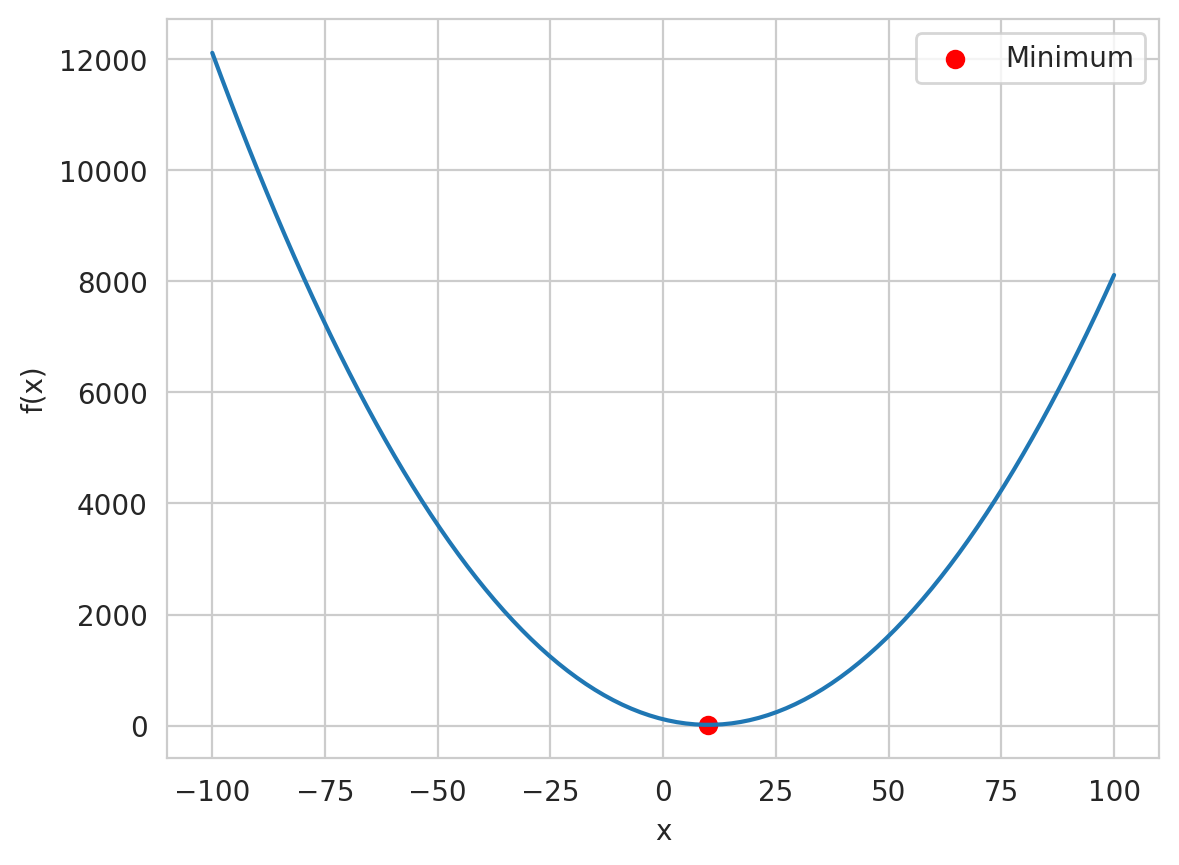

In [3]:
x = torch.linspace(-100, 100, 100)
y = func(x)

plt.plot(x, y)
plt.scatter([10], [14], label='Minimum', c='red')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [4]:
import time
from IPython import display

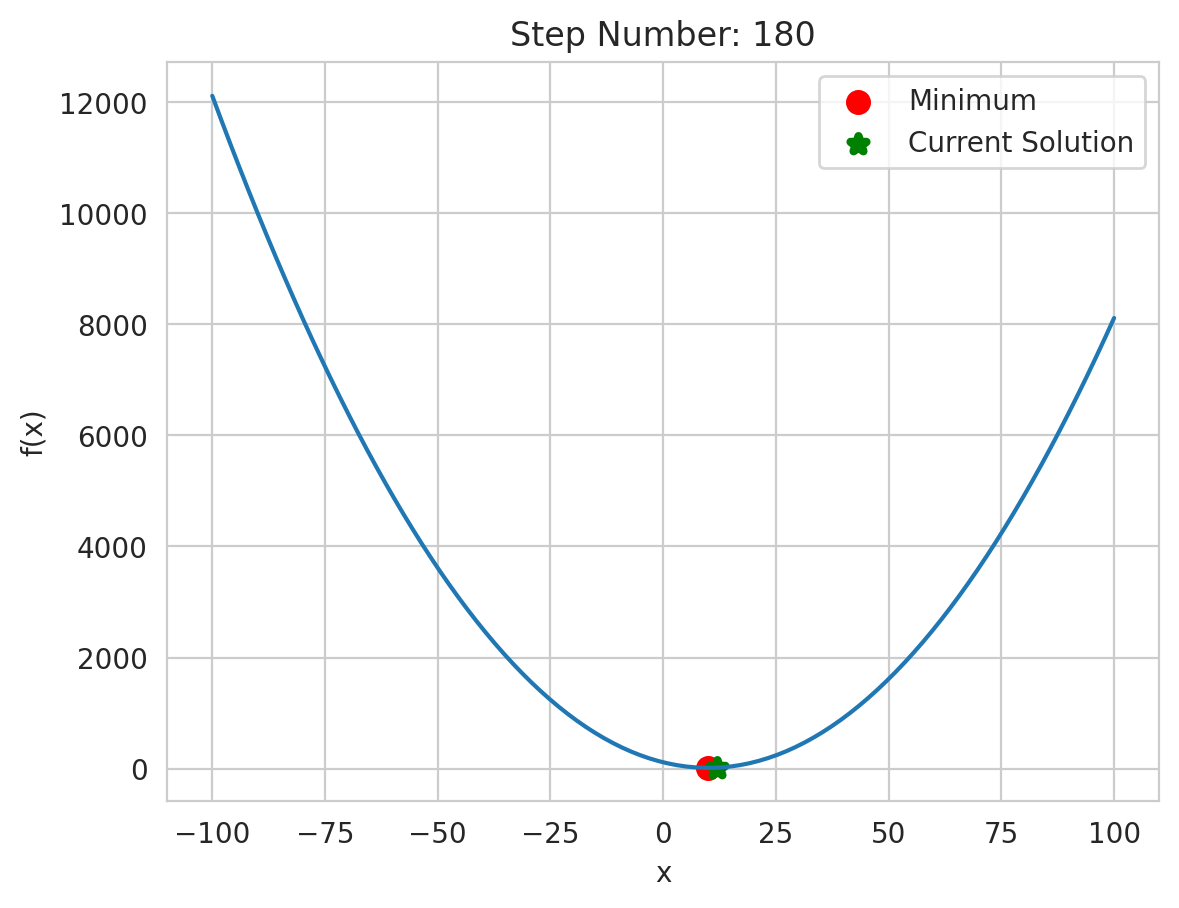

In [11]:
# requires_grad=True is required
# this is our starting point
current_solution = torch.randint(low=-100, high=100, size=(1,), dtype=torch.float32, requires_grad=True)

# initialize a simple SGD
# SGD will minimize only one variable — current_solution
optimizer = torch.optim.SGD([current_solution], lr=1e-2)

NUM_STEP = 200


for i in range(NUM_STEP):
    current_loss = func(current_solution)
    
    # zero out .grad of `current_solution` 
    # remember that otherwise your new gradients will be summed with the existing ones
    optimizer.zero_grad()
    
    # compute new gradient by `current_solution`
    current_loss.backward()
    
    # update current_solution
    optimizer.step()

    # some logging and visualization stuff
    if i % 20 == 0:
        display.clear_output()
        
        x = torch.linspace(-100, 100, 100)
        y = func(x)

        plt.plot(x, y)
        plt.scatter([10], [14], label="Minimum", c="red", linewidths=3)
        plt.scatter([current_solution.item()], [current_loss.item()],
                    label="Current Solution", marker="*", c="green", linewidths=3)
        
        plt.legend()
        plt.title(f"Step Number: {i}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()
        
        time.sleep(1)

# The General Pipeline

Training pipeline for your DNN model is similar to the example with some function above. To train your model you will need:

1. Define your model
2. Define a `Dataset` and `DataLoader`. Make sure you have at least 2 splits: train\test, so you can monitor performance on unseen data
3. Choose an optimizer. We advise you to use `torch.optim.Adam` or `torch.optim.AdamW` (if you use weight decay). Your optimizer should work with `model.parameters()` to optimize model weights. Basically, we will have `model.parameters()` instead of `[current_solution]` in the example above.
4. Choose a scheduler. That is, control learning rate (step size) for your optimizer. There are plenty of them in `torch.optim.lr_scheduler`. We advise you to use [CosineAnnealing](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html#torch.optim.lr_scheduler.CosineAnnealingLR) or [OneCycleLR](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.OneCycleLR.html#torch.optim.lr_scheduler.OneCycleLR). The latter uses warm-up technique (the learning rate goes from low value to high during the first several steps and then the scheduler decreases the learning rate as usual), which is essential for Transformer-based models. The absence of scheduler is equivalent to a constant learning rate.
5. Iterate over your dataloader (for DNNs you reuse the same dataloader (the data shuffles) several times, a.k.a. epochs). For each batch, compute the loss, do `.backward`, run `optimizer.step()` to update weights and `scheduler.step()` to update learning rate. **Do not forget to zero gradients between batches via calling `oprimizer.zero_grad()` after `step()` or at the beginning of the for-loop**. Do some logging (recommended).
6. Finish, your model is trained.

The choice of the scheduler and optimizer depends on the task. There is no such setting that works all the time, you should try several settings and choose the one that works best for your task. However, usually `Adam`, `AdamW` and one of the mentioned schedulers should do the work (You may need to tune `learning_rate` and `weight_decay`. Do not forget to think about the total number of training steps)

If you want to work with a model from some paper, the best starting point would be to use the **same** optimizer and scheduler (with the **same** hyperparameters, i.e., learning rate, weight decay, etc.), as was done by the authors. However, if the paper is rather **old** and do not use Adam\AdamW (or at least SGD), it is better to use our **suggested** schedulers and optimizers instead (unless you are sure what and why you are doing). The exception is the case when you want to **exactly reproduce** the results from the paper. In such a case, you must use the paper authors' setting to get the authors results.

**We will have a look at this pipeline in the next lesson**